📊 Customer Segmentation Using K-Means Clustering

📌 Objective
The goal of this analysis is to segment customers based on:

  + Total amount spent (TotalValue)
  + Number of transactions (NumTransactions)
  
We use K-Means Clustering to group similar customers and evaluate the clustering performance using:

  + Elbow Method (to find optimal clusters)
  + Silhouette Score
  + Davies-Bouldin Index


📥 Step 1: Importing Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

📥 Step 2: Load the Datasets

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with customer data
merged_data = transactions.merge(customers, on='CustomerID')

🔎 Step 3: Data Preparation

We create a customer profile based on:

+ Total spend (TotalValue)
+ Number of transactions (NumTransactions)

In [3]:
# Create a customer profile
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'TransactionID': 'count'  
}).reset_index()

# Rename columns for clarity
customer_profile.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

🔄 Step 4: Data Normalization

Since TotalValue and NumTransactions have different scales, we standardize the data using StandardScaler().

In [4]:
# Normalize the data
scaler = StandardScaler()
scaled_profiles = scaler.fit_transform(customer_profile[['TotalValue', 'NumTransactions']])

📊 Step 5: Finding Optimal Clusters (Elbow & Silhouette Method)

We determine the best number of clusters (k) using:

+ Elbow Method (minimizing inertia)
+ Silhouette Score (higher is better)

In [5]:
# Finding the optimal number of clusters
inertia = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_profiles)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_profiles, kmeans.labels_)
    silhouette_scores.append(score)

📌 Visualizing the Elbow & Silhouette Score

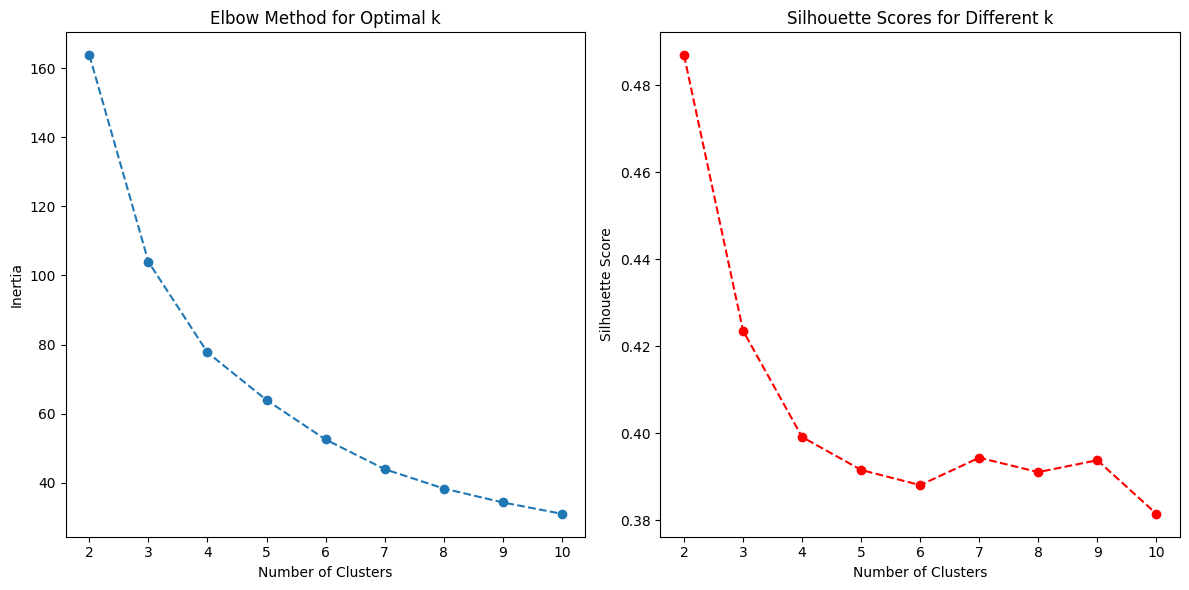

In [6]:
# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

🏆 Step 6: Apply K-Means Clustering

Based on the Elbow & Silhouette Score, we choose k=4 clusters.

In [7]:
# Applying K-Means with optimal clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_profiles)

📏 Step 7: Clustering Evaluation Metrics

We use:

+ Davies-Bouldin Index (Lower = Better)
+ Silhouette Score (Higher = Better)

In [8]:
# Evaluate clustering performance
db_index = davies_bouldin_score(scaled_profiles, customer_profile['Cluster'])
silhouette_avg = silhouette_score(scaled_profiles, customer_profile['Cluster'])

# Print evaluation metrics
print(f"✅ Number of clusters formed: {optimal_clusters}")
print(f"📉 Davies-Bouldin Index: {db_index:.4f}")
print(f"📈 Average Silhouette Score: {silhouette_avg:.4f}")

✅ Number of clusters formed: 4
📉 Davies-Bouldin Index: 0.8001
📈 Average Silhouette Score: 0.3991


🎨 Step 8: Visualizing the Clusters

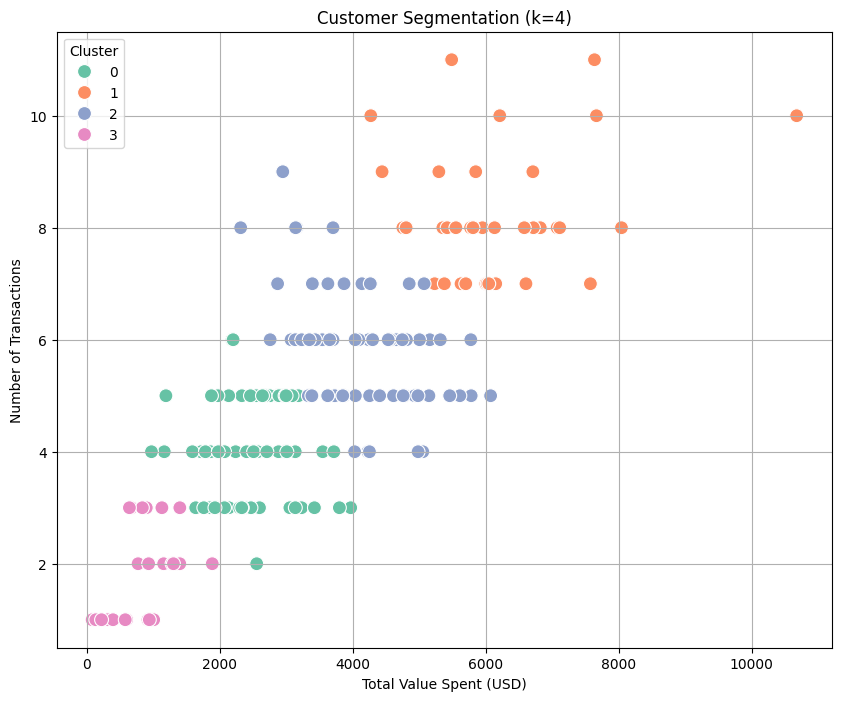

In [9]:
# Scatter plot for customer segmentation
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_profile, x='TotalValue', y='NumTransactions', hue='Cluster', palette='Set2', s=100)

# Formatting
plt.title(f'Customer Segmentation (k={optimal_clusters})')
plt.xlabel('Total Value Spent (USD)')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.grid()
plt.show()

💾 Step 9: Save Results

In [10]:
# Save segmentation results
customer_profile.to_csv('Customer_Segmentation_Results.csv', index=False)